In [ ]:
# problem statement: 
# Use Autoencoder to implement anomaly detection on credit card dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [2]:
df=pd.read_csv('/Users/poorvadityabehre/Desktop/College/DL_FINAL/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Drop the 'Time' column as it is not relevant for this example
df = df.drop(['Time'], axis=1)

# Standardize the 'Amount' column
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

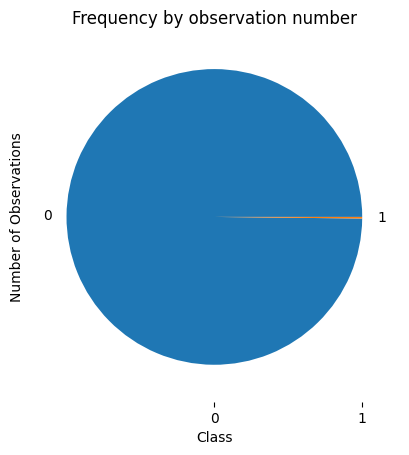

In [4]:
# Count the occurrences of each unique class in the 'Class' column
count_classes = pd.Series(df['Class']).value_counts(sort=True)

# Create a pie chart
count_classes.plot(kind='pie', rot=0)

# Set x-axis ticks to match the unique classes
plt.xticks(range(len(df['Class'].unique())), df.Class.unique())

# Set plot title and labels
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

# Display the pie chart
plt.show()

In [5]:
normal_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

In [6]:
train_data, _ = train_test_split(normal_data, test_size=0.2, random_state=42)

In [ ]:
print(test_data)

In [7]:
# Define the autoencoder model
input_dim = train_data.shape[1] - 1 # Exclude the 'Class' column
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder model 
autoencoder = Model(input_layer, decoded)

In [8]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [9]:
autoencoder.fit(train_data.drop(['Class'], axis=1), train_data.drop(['Class'],axis=1), epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/10
711/711 [==============================] - 1s 558us/step - loss: 0.9539 - accuracy: 0.4415 - val_loss: 0.8530 - val_accuracy: 0.5937
Epoch 2/10
711/711 [==============================] - 0s 447us/step - loss: 0.8010 - accuracy: 0.6298 - val_loss: 0.8093 - val_accuracy: 0.6602
Epoch 3/10
711/711 [==============================] - 0s 450us/step - loss: 0.7750 - accuracy: 0.6722 - val_loss: 0.7923 - val_accuracy: 0.6830
Epoch 4/10
711/711 [==============================] - 0s 454us/step - loss: 0.7623 - accuracy: 0.6888 - val_loss: 0.7821 - val_accuracy: 0.6959
Epoch 5/10
711/711 [==============================] - 0s 456us/step - loss: 0.7536 - accuracy: 0.7051 - val_loss: 0.7746 - val_accuracy: 0.7152
Epoch 6/10
711/711 [==============================] - 0s 509us/step - loss: 0.7470 - accuracy: 0.7262 - val_loss: 0.7691 - val_accuracy: 0.7323
Epoch 7/10
711/711 [==============================] - 0s 457us/step - loss: 0.7428 - accuracy: 0.7438 - val_loss: 0.7658 - val_accuracy:

In [10]:
reconstructed_normal = autoencoder.predict(normal_data.drop(['Class'], axis=1))
reconstructed_fraud = autoencoder.predict(fraud_data.drop(['Class'], axis=1))

16/16 [==============================] - 0s 286us/step


In [12]:
# Calculate the mean squared error (reconstruction error)
mse_normal = np.mean(np.square(normal_data.drop(['Class'], axis=1).values - reconstructed_normal))
mse_fraud = np.mean(np.square(fraud_data.drop(['Class'], axis=1).values - reconstructed_fraud))

In [27]:
threshold = mse_normal + 3 * np.std(mse_normal)
predicted_labels = np.where(mse_fraud > threshold, 1, 0)

In [14]:
accuracy = np.sum(predicted_labels == 1) / len(fraud_data)
print(f"Anomaly Detection Accuracy: {accuracy}")

Anomaly Detection Accuracy: 0.0020325203252032522


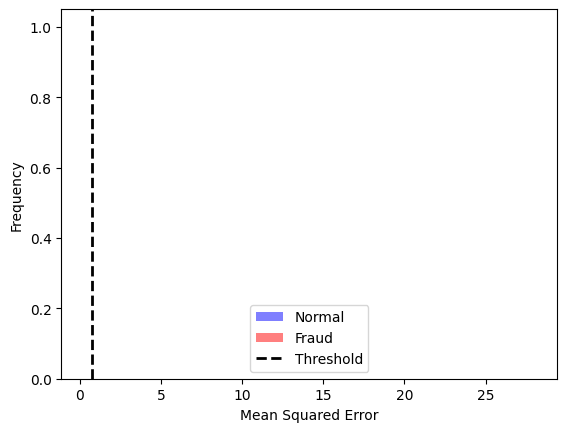

In [15]:
plt.hist(mse_normal, bins=50, label='Normal', alpha=0.5, color='blue')
plt.hist(mse_fraud, bins=50, label='Fraud', alpha=0.5, color='red')
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2,label='Threshold')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
print(predicted_labels.shape)
print(fraud_data.shape)
conf_matrix = confusion_matrix(fraud_data['Class'], predicted_labels)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate precision, recall, and F1 score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

()
(492, 30)


TypeError: Singleton array array(1) cannot be considered a valid collection.